**PART 1: Exploratory Analysis & Feature Engineering**

In [37]:
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential
import pandas as pd

# Connect to workspace
ml_client = MLClient(
    DefaultAzureCredential(),
    subscription_id="26c26559-208a-4c64-a94f-f0e8e4ab3b2f",
    resource_group_name="florida-housing-ml-ws",
    workspace_name="florida-housing-ml-ws-workspace"
)

# Get data asset
data_asset = ml_client.data.get(name="homes", version="1")

# The local path on the compute instance (Azure mounts blob storage automatically)
file_path = data_asset.path

print("File path:", file_path)

# Load CSV into pandas
df = pd.read_csv(file_path)
df.head()


File path: azureml://subscriptions/26c26559-208a-4c64-a94f-f0e8e4ab3b2f/resourcegroups/florida-housing-ml-ws/workspaces/florida-housing-ml-ws-workspace/datastores/workspaceblobstore/paths/UI/2025-11-16_021919_UTC/homes.csv


,Folio,PIN,PropertyType,Owner1,Owner2,MailingAddress1,MailingAddress2,MailingCity,MailingState,MailingZip,MailingCountry,SiteAddress,SiteCity,SiteZip,Acreage,Homestead,Legal1,Subdivision,Neighborhood,TaxDistrict,Municipality,TotalNumBuildings,TotalUnits,TotalStories,TotalBedrooms,TotalBathrooms,YearBuilt,TotalLandValue,TotalLandValue1,TotalBuildingValue,TotalExtraFeaturesValue,TotalHeatedAreaSqFt,TotalGrossAreaSqFt,JustValue,AssessedValue,TaxableValue,LastSaleDate,LastSalePrice,VacantImproved,Qualified,random
0,883298300,U-28-30-21-9PC-000110-00003.0,SINGLE FAMILY,FINN JOHN,FINN JERICHO,16410 CHAPMAN CROSSING DR,NaN,LITHIA,FL,33547-3956,NaN,16410 CHAPMAN CROSSING DR,LITHIA,33547,0.46,Yes,FISHHAWK CHAPMAN CROSSING PHASE 2 LOT 3 BLOCK 110,FISHHAWK CHAPMAN CROSSING PHASE 2,Fishhawk West Area,UNINCORPORATED,U,1,1,2.0,5,5.0,2014,186486,186486,612017,53271,4747,6513,851774,822318,772318,5/31/2019,889000,Improved,Qualified,5
1,883296182,U-28-30-21-770-EE0003-00004.0,SINGLE FAMILY,GOODHEAD BRIAN W,GOODHEAD MELISSA L,5907 CHURCHSIDE DR,NaN,LITHIA,FL,33547-4889,NaN,5907 CHURCHSIDE DR,LITHIA,33547,0.24,Yes,FISHHAWK RANCH TOWNCENTER PHASE 2A LOT 4 BLOCK...,FISHHAWK RANCH TOWNCENTER PHASE 2A,Fishhawk West Area,UNINCORPORATED,U,1,1,2.0,4,4.0,2012,101481,101481,311314,40488,3412,4493,453283,412602,362602,8/12/2015,559000,Improved,Qualified,6
2,883296632,U-28-30-21-771-II0000-00010.0,SINGLE FAMILY,GROUSE MICHAEL J TRUSTEE,GROUSE BONNY R TRUSTEE,15108 KESTRELGLEN WAY,NaN,LITHIA,FL,33547-4820,NaN,5904 BEACONPARK ST,LITHIA,33547,0.10,No,FISHHAWK RANCH TOWNCENTER PH2B LOT 10 BLOCK II,FISHHAWK RANCH TOWNCENTER PHASE 2B,Fishhawk West Area,UNINCORPORATED,U,1,1,2.0,3,2.5,2006,44712,44712,165605,0,2022,2888,210317,210317,210317,12/13/2017,100,Improved,Unqualified,11
3,883534162,U-32-30-21-69Y-000065-00031.0,SINGLE FAMILY,GORDON GEORGE,NaN,15829 SORAWATER DR,NaN,LITHIA,FL,33547-3911,NaN,15829 SORAWATER DR,LITHIA,33547,0.35,No,FISHHAWK RANCH PHASE 2 PARCEL B-B / C-C LOT 31...,FISHHAWK RANCH PHASE 2 PARCEL B-B / C-C,Fishhawk West Area,UNINCORPORATED,U,1,1,1.0,4,4.0,2005,123693,123693,397666,42184,3716,4927,563543,563543,563543,9/19/2019,381900,Improved,Unqualified,27
4,880921070,U-22-30-21-381-000003-00004.0,SINGLE FAMILY,BURGESS MICHAEL,BURGESS GIOVANA,16926 HAWKRIDGE RD,NaN,LITHIA,FL,33547-5809,NaN,16926 HAWKRIDGE RD,LITHIA,33547,0.20,Yes,FISHHAWK RANCH PHASE 1 UNITS 1A 2 AND 3 LOT 4 ...,FISHHAWK RANCH PHASE 1 UNITS 1A 2 AND 3,Fishhawk East Area,UNINCORPORATED,U,1,1,1.0,4,2.0,1998,60649,60649,151637,0,1975,2520,212286,186770,136770,4/20/2015,100,Improved,Unqualified,45


In [2]:
!pip install seaborn mlflow
!pip install plotly scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 41.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 69.8 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.8/76.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 62.2 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 75.8 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.6/248.6 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.2/323.2 kB 29.9 MB/s eta 0:00:00
  Attemp

In [6]:
import sys
!{sys.executable} -m pip install seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: /anaconda/envs/azureml_py310_sdkv2/bin/python -m pip install --upgrade pip


In [7]:
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

ml_client = MLClient(
    DefaultAzureCredential(),
    subscription_id="26c26559-208a-4c64-a94f-f0e8e4ab3b2f",
    resource_group_name="florida-housing-ml-ws",
    workspace_name="florida-housing-ml-ws-workspace"
)

dataset = ml_client.data.get(name="homes", version="1")
print(dataset.path)


azureml://subscriptions/26c26559-208a-4c64-a94f-f0e8e4ab3b2f/resourcegroups/florida-housing-ml-ws/workspaces/florida-housing-ml-ws-workspace/datastores/workspaceblobstore/paths/UI/2025-11-16_021919_UTC/homes.csv


In [38]:
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential
import pandas as pd

# Connect to workspace
ml_client = MLClient(
    DefaultAzureCredential(),
    subscription_id="26c26559-208a-4c64-a94f-f0e8e4ab3b2f",
    resource_group_name="florida-housing-ml-ws",
    workspace_name="florida-housing-ml-ws-workspace"
)

# Retrieve your FILE data asset
data_asset = ml_client.data.get(name="homes", version="1")

# FILE assets in Azure ML v2 give a direct local path
csv_path = data_asset.path
print("CSV Path:", csv_path)

# Load CSV into pandas
df = pd.read_csv(csv_path)
df.head()


CSV Path: azureml://subscriptions/26c26559-208a-4c64-a94f-f0e8e4ab3b2f/resourcegroups/florida-housing-ml-ws/workspaces/florida-housing-ml-ws-workspace/datastores/workspaceblobstore/paths/UI/2025-11-16_021919_UTC/homes.csv


,Folio,PIN,PropertyType,Owner1,Owner2,MailingAddress1,MailingAddress2,MailingCity,MailingState,MailingZip,MailingCountry,SiteAddress,SiteCity,SiteZip,Acreage,Homestead,Legal1,Subdivision,Neighborhood,TaxDistrict,Municipality,TotalNumBuildings,TotalUnits,TotalStories,TotalBedrooms,TotalBathrooms,YearBuilt,TotalLandValue,TotalLandValue1,TotalBuildingValue,TotalExtraFeaturesValue,TotalHeatedAreaSqFt,TotalGrossAreaSqFt,JustValue,AssessedValue,TaxableValue,LastSaleDate,LastSalePrice,VacantImproved,Qualified,random
0,883298300,U-28-30-21-9PC-000110-00003.0,SINGLE FAMILY,FINN JOHN,FINN JERICHO,16410 CHAPMAN CROSSING DR,NaN,LITHIA,FL,33547-3956,NaN,16410 CHAPMAN CROSSING DR,LITHIA,33547,0.46,Yes,FISHHAWK CHAPMAN CROSSING PHASE 2 LOT 3 BLOCK 110,FISHHAWK CHAPMAN CROSSING PHASE 2,Fishhawk West Area,UNINCORPORATED,U,1,1,2.0,5,5.0,2014,186486,186486,612017,53271,4747,6513,851774,822318,772318,5/31/2019,889000,Improved,Qualified,5
1,883296182,U-28-30-21-770-EE0003-00004.0,SINGLE FAMILY,GOODHEAD BRIAN W,GOODHEAD MELISSA L,5907 CHURCHSIDE DR,NaN,LITHIA,FL,33547-4889,NaN,5907 CHURCHSIDE DR,LITHIA,33547,0.24,Yes,FISHHAWK RANCH TOWNCENTER PHASE 2A LOT 4 BLOCK...,FISHHAWK RANCH TOWNCENTER PHASE 2A,Fishhawk West Area,UNINCORPORATED,U,1,1,2.0,4,4.0,2012,101481,101481,311314,40488,3412,4493,453283,412602,362602,8/12/2015,559000,Improved,Qualified,6
2,883296632,U-28-30-21-771-II0000-00010.0,SINGLE FAMILY,GROUSE MICHAEL J TRUSTEE,GROUSE BONNY R TRUSTEE,15108 KESTRELGLEN WAY,NaN,LITHIA,FL,33547-4820,NaN,5904 BEACONPARK ST,LITHIA,33547,0.10,No,FISHHAWK RANCH TOWNCENTER PH2B LOT 10 BLOCK II,FISHHAWK RANCH TOWNCENTER PHASE 2B,Fishhawk West Area,UNINCORPORATED,U,1,1,2.0,3,2.5,2006,44712,44712,165605,0,2022,2888,210317,210317,210317,12/13/2017,100,Improved,Unqualified,11
3,883534162,U-32-30-21-69Y-000065-00031.0,SINGLE FAMILY,GORDON GEORGE,NaN,15829 SORAWATER DR,NaN,LITHIA,FL,33547-3911,NaN,15829 SORAWATER DR,LITHIA,33547,0.35,No,FISHHAWK RANCH PHASE 2 PARCEL B-B / C-C LOT 31...,FISHHAWK RANCH PHASE 2 PARCEL B-B / C-C,Fishhawk West Area,UNINCORPORATED,U,1,1,1.0,4,4.0,2005,123693,123693,397666,42184,3716,4927,563543,563543,563543,9/19/2019,381900,Improved,Unqualified,27
4,880921070,U-22-30-21-381-000003-00004.0,SINGLE FAMILY,BURGESS MICHAEL,BURGESS GIOVANA,16926 HAWKRIDGE RD,NaN,LITHIA,FL,33547-5809,NaN,16926 HAWKRIDGE RD,LITHIA,33547,0.20,Yes,FISHHAWK RANCH PHASE 1 UNITS 1A 2 AND 3 LOT 4 ...,FISHHAWK RANCH PHASE 1 UNITS 1A 2 AND 3,Fishhawk East Area,UNINCORPORATED,U,1,1,1.0,4,2.0,1998,60649,60649,151637,0,1975,2520,212286,186770,136770,4/20/2015,100,Improved,Unqualified,45


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 200)

# Basic info
print("Shape:", df.shape)
display(df.head())

# Missing values
missing = df.isnull().sum().sort_values(ascending=False)
print("\nMissing Values:")
display(missing)

# Summary statistics
display(df.describe(include="all"))


Shape: (7478, 41)


,Folio,PIN,PropertyType,Owner1,Owner2,MailingAddress1,MailingAddress2,MailingCity,MailingState,MailingZip,MailingCountry,SiteAddress,SiteCity,SiteZip,Acreage,Homestead,Legal1,Subdivision,Neighborhood,TaxDistrict,Municipality,TotalNumBuildings,TotalUnits,TotalStories,TotalBedrooms,TotalBathrooms,YearBuilt,TotalLandValue,TotalLandValue1,TotalBuildingValue,TotalExtraFeaturesValue,TotalHeatedAreaSqFt,TotalGrossAreaSqFt,JustValue,AssessedValue,TaxableValue,LastSaleDate,LastSalePrice,VacantImproved,Qualified,random
0,883298300,U-28-30-21-9PC-000110-00003.0,SINGLE FAMILY,FINN JOHN,FINN JERICHO,16410 CHAPMAN CROSSING DR,NaN,LITHIA,FL,33547-3956,NaN,16410 CHAPMAN CROSSING DR,LITHIA,33547,0.46,Yes,FISHHAWK CHAPMAN CROSSING PHASE 2 LOT 3 BLOCK 110,FISHHAWK CHAPMAN CROSSING PHASE 2,Fishhawk West Area,UNINCORPORATED,U,1,1,2.0,5,5.0,2014,186486,186486,612017,53271,4747,6513,851774,822318,772318,5/31/2019,889000,Improved,Qualified,5
1,883296182,U-28-30-21-770-EE0003-00004.0,SINGLE FAMILY,GOODHEAD BRIAN W,GOODHEAD MELISSA L,5907 CHURCHSIDE DR,NaN,LITHIA,FL,33547-4889,NaN,5907 CHURCHSIDE DR,LITHIA,33547,0.24,Yes,FISHHAWK RANCH TOWNCENTER PHASE 2A LOT 4 BLOCK...,FISHHAWK RANCH TOWNCENTER PHASE 2A,Fishhawk West Area,UNINCORPORATED,U,1,1,2.0,4,4.0,2012,101481,101481,311314,40488,3412,4493,453283,412602,362602,8/12/2015,559000,Improved,Qualified,6
2,883296632,U-28-30-21-771-II0000-00010.0,SINGLE FAMILY,GROUSE MICHAEL J TRUSTEE,GROUSE BONNY R TRUSTEE,15108 KESTRELGLEN WAY,NaN,LITHIA,FL,33547-4820,NaN,5904 BEACONPARK ST,LITHIA,33547,0.10,No,FISHHAWK RANCH TOWNCENTER PH2B LOT 10 BLOCK II,FISHHAWK RANCH TOWNCENTER PHASE 2B,Fishhawk West Area,UNINCORPORATED,U,1,1,2.0,3,2.5,2006,44712,44712,165605,0,2022,2888,210317,210317,210317,12/13/2017,100,Improved,Unqualified,11
3,883534162,U-32-30-21-69Y-000065-00031.0,SINGLE FAMILY,GORDON GEORGE,NaN,15829 SORAWATER DR,NaN,LITHIA,FL,33547-3911,NaN,15829 SORAWATER DR,LITHIA,33547,0.35,No,FISHHAWK RANCH PHASE 2 PARCEL B-B / C-C LOT 31...,FISHHAWK RANCH PHASE 2 PARCEL B-B / C-C,Fishhawk West Area,UNINCORPORATED,U,1,1,1.0,4,4.0,2005,123693,123693,397666,42184,3716,4927,563543,563543,563543,9/19/2019,381900,Improved,Unqualified,27
4,880921070,U-22-30-21-381-000003-00004.0,SINGLE FAMILY,BURGESS MICHAEL,BURGESS GIOVANA,16926 HAWKRIDGE RD,NaN,LITHIA,FL,33547-5809,NaN,16926 HAWKRIDGE RD,LITHIA,33547,0.20,Yes,FISHHAWK RANCH PHASE 1 UNITS 1A 2 AND 3 LOT 4 ...,FISHHAWK RANCH PHASE 1 UNITS 1A 2 AND 3,Fishhawk East Area,UNINCORPORATED,U,1,1,1.0,4,2.0,1998,60649,60649,151637,0,1975,2520,212286,186770,136770,4/20/2015,100,Improved,Unqualified,45



Missing Values:


MailingCountry             7473
MailingAddress2            7383
Owner2                     1898
MailingZip                    2
SiteCity                      1
Folio                         0
TotalGrossAreaSqFt            0
TotalBathrooms                0
YearBuilt                     0
TotalLandValue                0
TotalLandValue1               0
TotalBuildingValue            0
TotalExtraFeaturesValue       0
TotalHeatedAreaSqFt           0
AssessedValue                 0
JustValue                     0
TotalStories                  0
TaxableValue                  0
LastSaleDate                  0
LastSalePrice                 0
VacantImproved                0
Qualified                     0
TotalBedrooms                 0
Municipality                  0
TotalUnits                    0
SiteZip                       0
PropertyType                  0
Owner1                        0
MailingAddress1               0
MailingCity                   0
MailingState                  0
SiteAddr

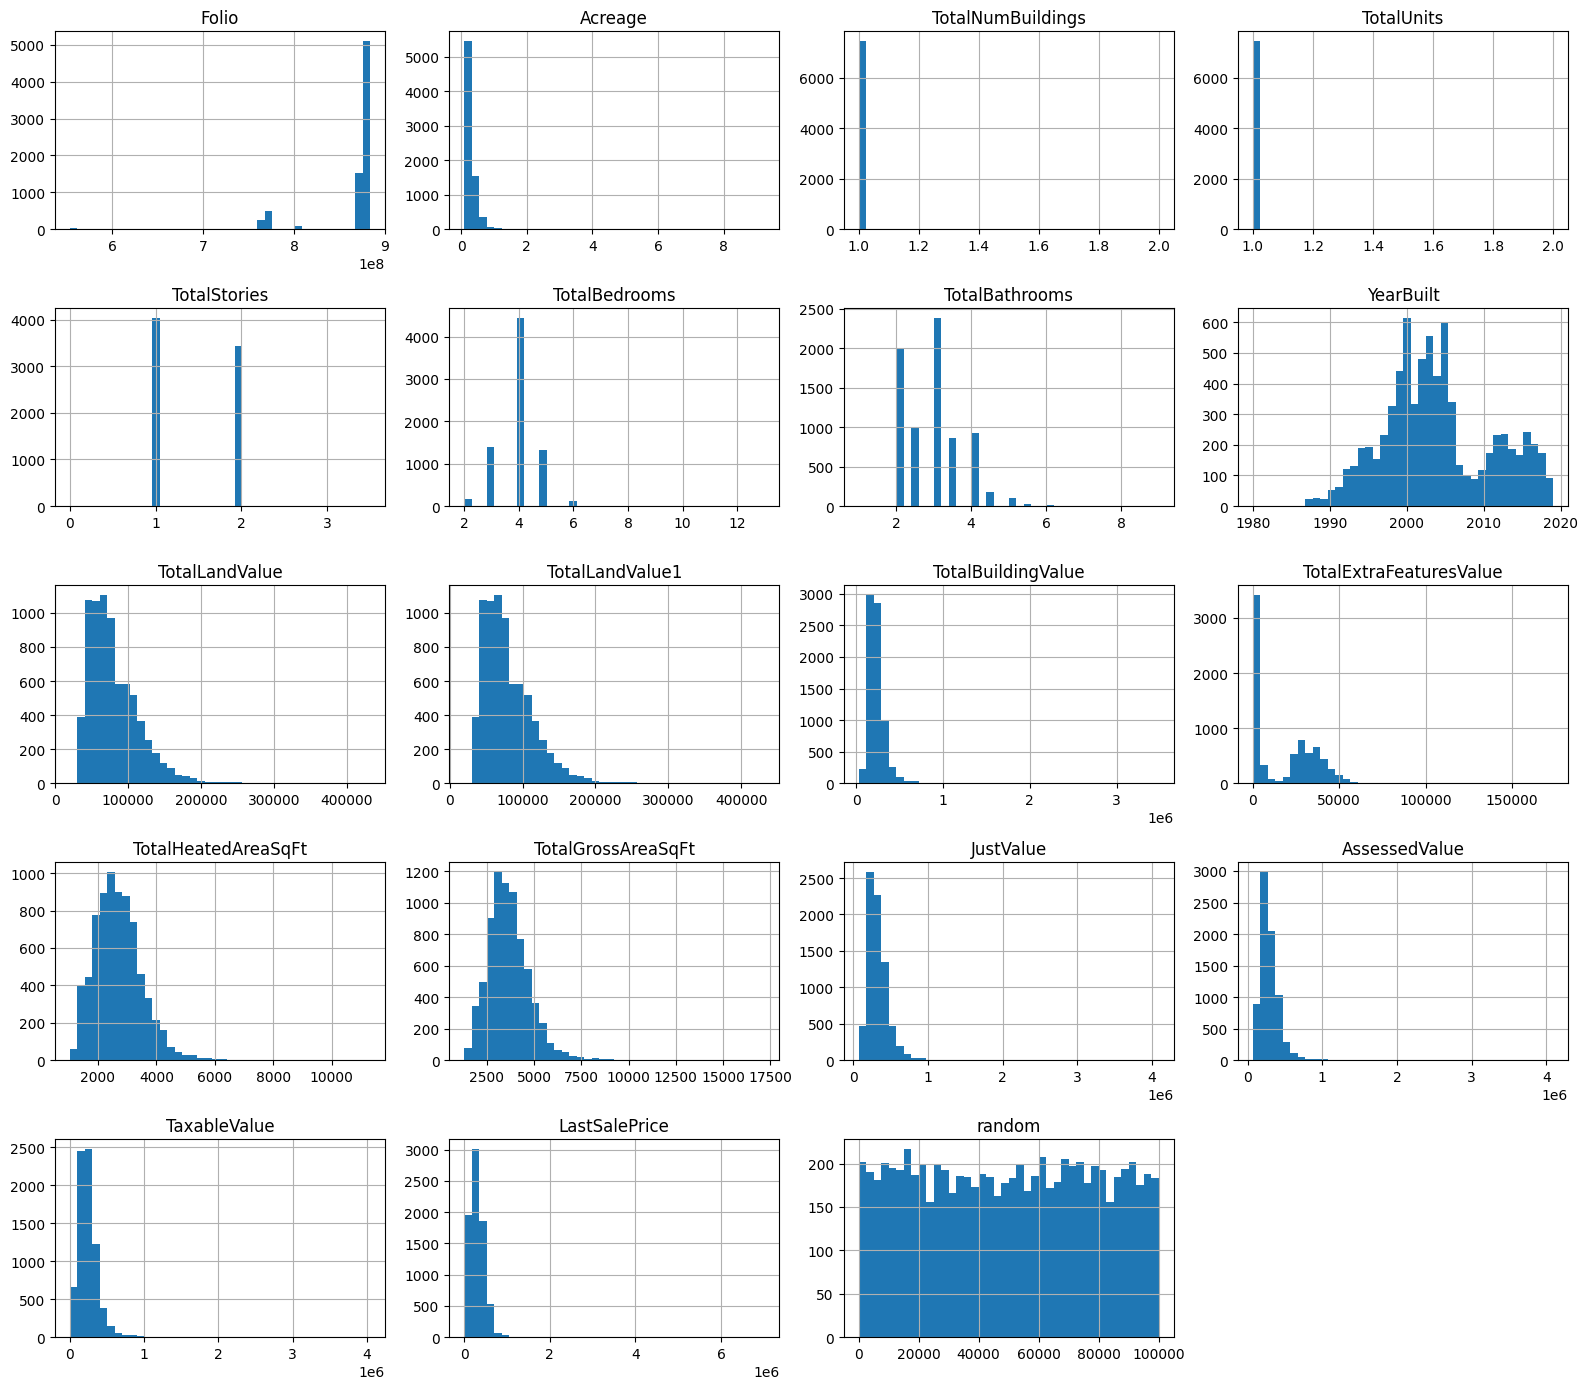

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['int64','float64']).columns

df[numeric_cols].hist(bins=40, figsize=(16,14))
plt.tight_layout()
plt.show()


In [39]:
outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    is_outlier = (df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)
    outlier_summary[col] = int(is_outlier.sum())

print("Outlier count per numeric column:")
outlier_summary


Outlier count per numeric column:


{'Folio': 851,
 'Acreage': 312,
 'TotalNumBuildings': 7,
 'TotalUnits': 7,
 'TotalStories': 0,
 'TotalBedrooms': 3033,
 'TotalBathrooms': 23,
 'YearBuilt': 2,
 'TotalLandValue': 155,
 'TotalLandValue1': 155,
 'TotalBuildingValue': 262,
 'TotalExtraFeaturesValue': 9,
 'TotalHeatedAreaSqFt': 127,
 'TotalGrossAreaSqFt': 164,
 'JustValue': 221,
 'AssessedValue': 246,
 'TaxableValue': 243,
 'LastSalePrice': 102,
 'random': 0}

**Data quality issues (at least 5):**

MailingCountry has 7,473 missing values (~75% of rows) → not reliable for modeling.

MailingAddress2 has 7,383 missing values → mostly empty, candidate for dropping.

Owner2 is missing for 1,898 rows → many properties have a single recorded owner.

MailingZip and SiteCity have a few missing values (2 and 1 rows) → small but need handling (impute or drop).

LastSaleDate is a string and must be converted to datetime for time-based features.This requires conversion for feature engineering.

TotalLandValue and TotalLandValue1 appear to duplicate the same concept → potential redundancy / multicollinearity.
This is a structural quality issue → we must check if they are identical.

Several numeric variables (JustValue, LastSalePrice, Acreage) are highly skewed with extreme outliers, as seen in the histograms and IQR outlier counts.

**Feature engineering**

In [40]:
from datetime import datetime

# Ensure LastSaleDate is datetime
df["LastSaleDate"] = pd.to_datetime(df["LastSaleDate"], errors="coerce")

# 1. Price per SqFt
df["PricePerSqFt"] = df["JustValue"] / df["TotalHeatedAreaSqFt"].replace(0, np.nan)

# 2. Property age
df["PropertyAge"] = 2025 - df["YearBuilt"]

# 3. Value per Acre
df["ValuePerAcre"] = df["JustValue"] / df["Acreage"].replace(0, np.nan)

# 4. Building-to-land value ratio
df["BuildingToLandRatio"] = df["TotalBuildingValue"] / df["TotalLandValue"].replace(0, np.nan)

# 5. Days since last sale
df["LastSaleAge"] = (pd.to_datetime("2025-01-01") - df["LastSaleDate"]).dt.days

# 6. Mispriced flag
THRESHOLD = 50000
df["IsMispriced"] = (df["LastSalePrice"] - df["JustValue"]).abs() > THRESHOLD

# 7. Bathroom-to-bedroom ratio
df["BathBedRatio"] = df["TotalBathrooms"] / df["TotalBedrooms"].replace(0, np.nan)

# 8. Neighborhood median value
df["NeighborhoodMedianValue"] = df.groupby("Neighborhood")["JustValue"].transform("median")

# 9. ZIP median value
df["ZipMedianValue"] = df.groupby("SiteZip")["JustValue"].transform("median")

# 10. Geographic cluster (first 2 digits of ZIP)
df["GeoCluster"] = df["SiteZip"].astype(str).str[:2]

# 11. Luxury indicator: high value per sqft or extra features
df["LuxuryIndicator"] = (
    (df["PricePerSqFt"] > df["PricePerSqFt"].quantile(0.90)) |
    (df["TotalExtraFeaturesValue"] > 0)
).astype(int)

# 12. Building share of total value
df["BuildingValueShare"] = df["TotalBuildingValue"] / df["JustValue"].replace(0, np.nan)

engineered_cols = [
    "PricePerSqFt","PropertyAge","ValuePerAcre","BuildingToLandRatio",
    "LastSaleAge","IsMispriced","BathBedRatio","NeighborhoodMedianValue",
    "ZipMedianValue","GeoCluster","LuxuryIndicator","BuildingValueShare"
]

print("Engineered features:", engineered_cols)
df[engineered_cols].head()


Engineered features: ['PricePerSqFt', 'PropertyAge', 'ValuePerAcre', 'BuildingToLandRatio', 'LastSaleAge', 'IsMispriced', 'BathBedRatio', 'NeighborhoodMedianValue', 'ZipMedianValue', 'GeoCluster', 'LuxuryIndicator', 'BuildingValueShare']


,PricePerSqFt,PropertyAge,ValuePerAcre,BuildingToLandRatio,LastSaleAge,IsMispriced,BathBedRatio,NeighborhoodMedianValue,ZipMedianValue,GeoCluster,LuxuryIndicator,BuildingValueShare
0,179.434169,11,1.851683e+06,3.281839,2042,False,1.000000,298506.0,299999.0,33,1,0.718520
1,132.849648,13,1.888679e+06,3.067707,3430,True,1.000000,298506.0,299999.0,33,1,0.686798
2,104.014342,19,2.103170e+06,3.703816,2576,True,0.833333,298506.0,299999.0,33,0,0.787407
3,151.653122,20,1.610123e+06,3.214943,1931,True,1.000000,298506.0,299999.0,33,1,0.705653
4,107.486582,27,1.061430e+06,2.500239,3544,True,0.500000,213112.5,299999.0,33,0,0.714305


**Coorelation analysis**

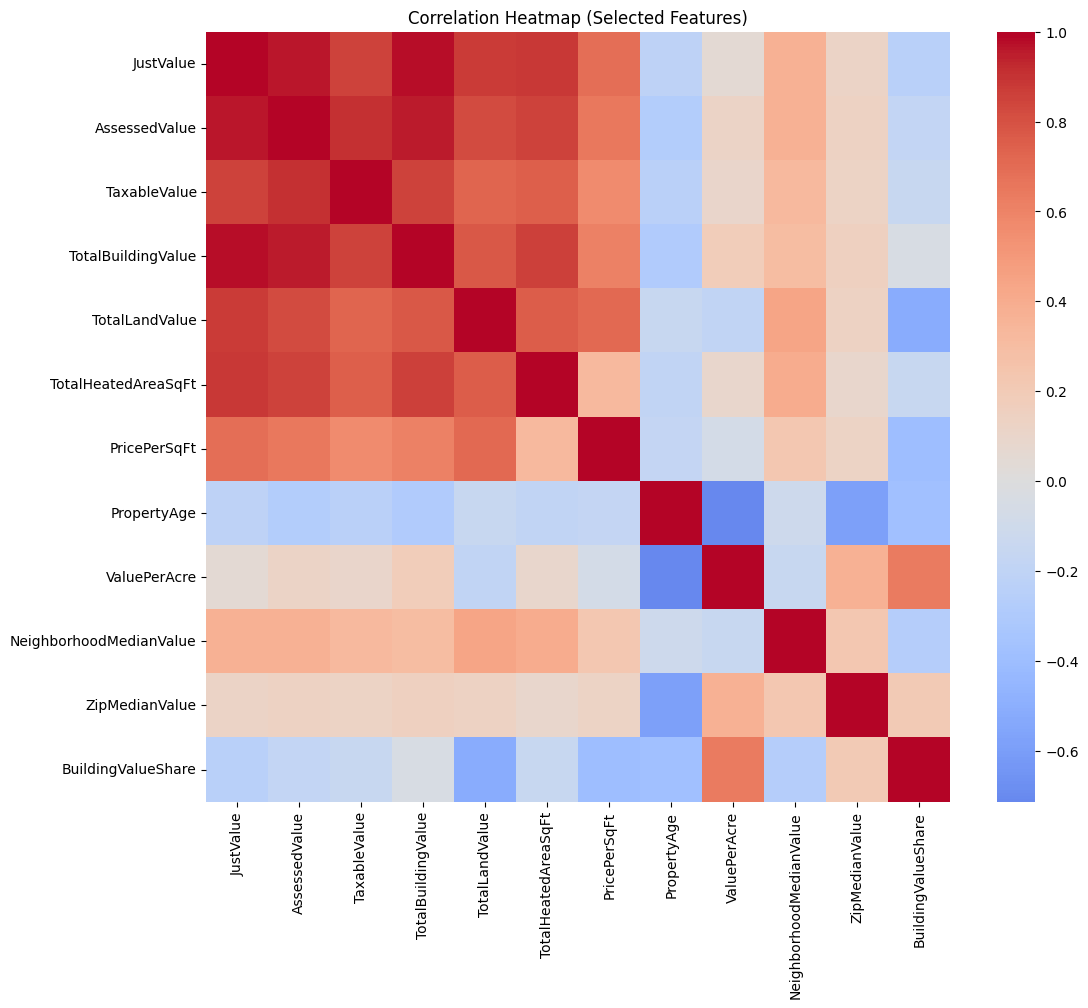

Correlation with JustValue:
JustValue                  1.000000
TotalBuildingValue         0.975920
AssessedValue              0.962296
TotalHeatedAreaSqFt        0.882581
TotalLandValue             0.878472
TaxableValue               0.857576
PricePerSqFt               0.686774
NeighborhoodMedianValue    0.367271
ZipMedianValue             0.121182
ValuePerAcre               0.054782
PropertyAge               -0.214334
BuildingValueShare        -0.240701
Name: JustValue, dtype: float64


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a subset of numeric features for clearer heatmap
corr_features = [
    "JustValue",
    "AssessedValue",
    "TaxableValue",
    "TotalBuildingValue",
    "TotalLandValue",
    "TotalHeatedAreaSqFt",
    "PricePerSqFt",
    "PropertyAge",
    "ValuePerAcre",
    "NeighborhoodMedianValue",
    "ZipMedianValue",
    "BuildingValueShare"
]

corr_matrix = df[corr_features].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Selected Features)")
plt.show()

# Sort correlations with JustValue
print("Correlation with JustValue:")
print(corr_matrix["JustValue"].sort_values(ascending=False))


Strongest predictors of JustValue:

AssessedValue and TaxableValue have very high positive correlation with JustValue (close to 1).

TotalBuildingValue and TotalLandValue also correlate strongly with JustValue.

Engineered location features (NeighborhoodMedianValue, ZipMedianValue) show moderate positive correlation, capturing spatial effects.

PricePerSqFt and BuildingValueShare add additional signal related to intensity of development.

Multicollinearity issues:

JustValue, AssessedValue, and TaxableValue are highly collinear (all measuring value).

TotalLandValue and TotalLandValue1 (if you include it) are redundant.

TotalBuildingValue, BuildingValueShare, and PricePerSqFt are related; using all of them in some linear models may cause instability.

In modeling, you would avoid including highly correlated pairs together or use regularized models (L1/L2).

In [43]:
import mlflow
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

# ------------------------------------------
# 1. Connect to Azure ML
# ------------------------------------------
ml_client = MLClient(
    DefaultAzureCredential(),
    subscription_id="26c26559-208a-4c64-a94f-f0e8e4ab3b2f",
    resource_group_name="florida-housing-ml-ws",
    workspace_name="florida-housing-ml-ws-workspace"
)

# Get MLflow tracking URI
tracking_uri = ml_client.workspaces.get("florida-housing-ml-ws-workspace").mlflow_tracking_uri
mlflow.set_tracking_uri(tracking_uri)

# Set experiment
mlflow.set_experiment("florida_housing_part1")

print("MLflow tracking URI:", tracking_uri)


# ------------------------------------------
# 2. Compute correlation matrix (fix variable)
# ------------------------------------------
numeric_df = df.select_dtypes(include="number")
corr_matrix = numeric_df.corr()


# ------------------------------------------
# 3. Identify engineered columns
# ------------------------------------------
engineered_cols = [
    "PricePerSqFt", "PropertyAge", "ValuePerAcre", "BuildingToLandRatio",
    "LastSaleAge", "BathroomBedroomRatio", "IsLuxury",
    "IsMispriced", "ZipMedianValue"
]


# ------------------------------------------
# 4. START MLflow RUN
# ------------------------------------------
with mlflow.start_run(run_name="EDA_and_Feature_Engineering"):

    # --- Log basic dataset stats ---
    mlflow.log_param("n_rows", int(df.shape[0]))
    mlflow.log_param("n_columns", int(df.shape[1]))
    mlflow.log_param("n_engineered_features", len(engineered_cols))

    # --- Log missing values for selected fields ---
    mlflow.log_metric("missing_MailingCountry", int(df["MailingCountry"].isna().sum()))
    mlflow.log_metric("missing_MailingAddress2", int(df["MailingAddress2"].isna().sum()))
    mlflow.log_metric("missing_Owner2", int(df["Owner2"].isna().sum()))

    # --- Save correlation heatmap ---
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0)
    plt.title("Correlation Heatmap (Selected Numeric Features)")
    heatmap_path = "correlation_heatmap.png"
    plt.savefig(heatmap_path, bbox_inches="tight")
    plt.close()

    mlflow.log_artifact(heatmap_path, artifact_path="plots")

    # --- Log data quality issues text file ---
    issues_text = """
Data Quality Issues Identified:
1. MailingCountry has very high missingness (~75%).
2. MailingAddress2 has very high missingness.
3. Owner2 missing for ~20% of records.
4. LastSaleDate was a string; converted to datetime.
5. TotalLandValue and TotalLandValue1 appear redundant.
6. Strong multicollinearity among value fields (JustValue, AssessedValue, TaxableValue).
7. Many value-related fields have heavy skew + extreme outliers.
"""
    with open("data_quality_issues.txt", "w") as f:
        f.write(issues_text)

    mlflow.log_artifact("data_quality_issues.txt", artifact_path="eda")

print("MLflow run logged to Azure ML successfully.")


2025/11/16 07:44:36 INFO mlflow.tracking.fluent: Experiment with name 'florida_housing_part1' does not exist. Creating a new experiment.


MLflow tracking URI: azureml://eastus2.api.azureml.ms/mlflow/v2.0/subscriptions/26c26559-208a-4c64-a94f-f0e8e4ab3b2f/resourceGroups/florida-housing-ml-ws/providers/Microsoft.MachineLearningServices/workspaces/florida-housing-ml-ws-workspace
🏃 View run EDA_and_Feature_Engineering at: https://eastus2.api.azureml.ms/mlflow/v2.0/subscriptions/26c26559-208a-4c64-a94f-f0e8e4ab3b2f/resourceGroups/florida-housing-ml-ws/providers/Microsoft.MachineLearningServices/workspaces/florida-housing-ml-ws-workspace/#/experiments/fa643dd5-f906-4001-81de-31cccf759227/runs/0c9ef572-56a7-42a4-bb0e-9a37add5dec5
🧪 View experiment at: https://eastus2.api.azureml.ms/mlflow/v2.0/subscriptions/26c26559-208a-4c64-a94f-f0e8e4ab3b2f/resourceGroups/florida-housing-ml-ws/providers/Microsoft.MachineLearningServices/workspaces/florida-housing-ml-ws-workspace/#/experiments/fa643dd5-f906-4001-81de-31cccf759227
MLflow run logged to Azure ML successfully.


In [41]:
df[engineered_cols].head()

,PricePerSqFt,PropertyAge,ValuePerAcre,BuildingToLandRatio,LastSaleAge,IsMispriced,BathBedRatio,NeighborhoodMedianValue,ZipMedianValue,GeoCluster,LuxuryIndicator,BuildingValueShare
0,179.434169,11,1.851683e+06,3.281839,2042,False,1.000000,298506.0,299999.0,33,1,0.718520
1,132.849648,13,1.888679e+06,3.067707,3430,True,1.000000,298506.0,299999.0,33,1,0.686798
2,104.014342,19,2.103170e+06,3.703816,2576,True,0.833333,298506.0,299999.0,33,0,0.787407
3,151.653122,20,1.610123e+06,3.214943,1931,True,1.000000,298506.0,299999.0,33,1,0.705653
4,107.486582,27,1.061430e+06,2.500239,3544,True,0.500000,213112.5,299999.0,33,0,0.714305


In [42]:
df_engineered = df[engineered_cols]
df_engineered.to_csv("engineered_features_only.csv", index=False)
